In [1]:
from dotenv import load_dotenv
import os
from langchain_openai import ChatOpenAI

In [47]:
from langgraph.graph import StateGraph
from IPython.display import Image, display
import operator
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage

In [48]:
class AgenticState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [49]:
def function1(state: AgenticState):
    return {"messages": state["messages"] + [AIMessage(content="Function 1 executed")]}

In [50]:
def function2(state: AgenticState):
    return {"messages": state["messages"] + [AIMessage(content="Function 2 executed")]}

In [51]:
workflow = StateGraph(AgenticState)

In [52]:
workflow.add_node("func1", function1)
workflow.add_node("func2", function2)

In [53]:
workflow.add_edge("func1", "func2")
workflow.set_entry_point("func1")
workflow.set_finish_point("func2")

In [54]:
app = workflow.compile()

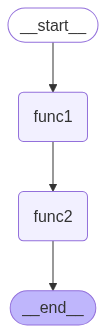

In [55]:
display(Image(app.get_graph().draw_mermaid_png()))

In [56]:
# response = app.invoke({"messages": ["What is the capital of France?"]})
# response = app.invoke("What is the capital of France?")
# response = app.invoke({
#     "messages": [HumanMessage(content="What is the capital of France?")]
# })
app.invoke({"messages":["what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?"]})

{'messages': [HumanMessage(content='what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?', additional_kwargs={}, response_metadata={}, id='aa73be53-b7a1-4100-abbf-fcc945414638'),
  AIMessage(content='Function 1 executed', additional_kwargs={}, response_metadata={}, id='bdd941d7-605c-43d8-8035-1f49395390de'),
  AIMessage(content='Function 2 executed', additional_kwargs={}, response_metadata={}, id='02932e32-2e72-4ebd-8b54-59b3a7c4464c')]}

In [60]:
for output in app.stream({"messages":["what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from func1
_______
{'messages': [HumanMessage(content='what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?', additional_kwargs={}, response_metadata={}, id='29cdbda1-407d-483f-b735-86a43212874e'), AIMessage(content='Function 1 executed', additional_kwargs={}, response_metadata={}, id='f28c59eb-b089-4710-a393-584322e067bc')]}


here is output from func2
_______
{'messages': [HumanMessage(content='what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?', additional_kwargs={}, response_metadata={}, id='29cdbda1-407d-483f-b735-86a43212874e'), AIMessage(content='Function 1 executed', additional_kwargs={}, response_metadata={}, id='f28c59eb-b089-4710-a393-584322e067bc'), AIMessage(content='Function 2 executed', additional_kwargs={}, response_metadata={}, id='56ba519f-5a9e-4539-8197-1596325abad1')]}


